In [ ]:
pip install BeautifulSoup4

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tabulate import tabulate
import re  # Import the re module for regular expressions
import time

start_time = time.time()

# Create a list that contains the URL for each page.
pages = []

# URL of the website to scrape
url = "https://housing.com/in/buy/searches/Pfkgym5kvlhge7gn"

# Set the User-Agent header to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Increase the timeout value to 30 seconds (adjust as needed)
response = requests.get(url, headers=headers, timeout=60)

# Check if the response was successful
if response.status_code == 200:
    # Create a BeautifulSoup object to parse the HTML content
    soup = bs(response.content, "html.parser")

    # Find all the data listings on the page
    listings = soup.find_all("article", class_="css-1nr7r9e")

    # Create an empty DataFrame to store the data
    data = pd.DataFrame(columns=["Location", "Price_in_lac", "area", "BHK"])

    # Iterate over each data listing and extract the required information
    for listing in listings:
        # Extract the location of the data if it exists
        location_element = listing.find("div", class_="css-2rx1iy")
        location_text = location_element.text.strip() if location_element else "N/A"

        # Use regular expressions to remove numeric and word "BHK" from location_text
        location_clean = re.sub(r'\d+', '', location_text)  # Remove numeric characters
        location_clean = location_clean.replace("BHK", "").strip()  # Remove "BHK" and strip whitespace

        # Extract the area of the data if it exists
        area_element = listing.find("div", class_="css-4z3njv")
        area = area_element.text.strip() if area_element else "N/A"

        # Extract the price of the data if it exists
        price_in_lac_element = listing.find("div", class_="css-18rodr0")
        price_in_lac_text = price_in_lac_element.text.strip() if price_in_lac_element else "N/A"

        # Use regular expressions to extract numeric characters from price_text
        price_in_lac_numeric = re.search(r'\d+\.\d', price_in_lac_text)
        price_in_lac = float(price_in_lac_numeric.group()) if price_in_lac_numeric else None

        # Extract the BHK for the data if it exists
        BHK_element = listing.find("div", class_="_sq1l2s _vv1q9c _ks15vq _7s5wglyw _5vy24jg8 _blas1v10 new-title")
        BHK_text = BHK_element.text.strip() if BHK_element else "N/A"

        # Use regular expressions to extract numeric characters from BHK_text
        BHK_numeric = re.search(r'\d+', BHK_text)
        BHK = int(BHK_numeric.group()) if BHK_numeric else None

        # Append the extracted information to the DataFrame
        data = data.append({"Location": location_clean, "Price_in_lac": price_in_lac, "area": area, "BHK": BHK}, ignore_index=True)

    # Print the entire DataFrame
    print(tabulate(data, headers="keys", tablefmt="grid"))

else:
    print("Failed to retrieve data. Status code:", response.status_code)

# Calculate and print the execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

+----+--------------------------------------------------+----------------+---------------+-------+
|    | Location                                         |   Price_in_lac | area          |   BHK |
+====+==================================================+================+===============+=======+
|  0 | Flat for sale in Dwarka Mor                      |           60   | 920 sq.ft     |     3 |
+----+--------------------------------------------------+----------------+---------------+-------+
|  1 | Guru Ji Builders And Developers .                |          nan   | Ready to Move |       |
+----+--------------------------------------------------+----------------+---------------+-------+
|  2 | Independent Builder Floor for sale in Dwarka Mor |           35   | 650 sq.ft     |     2 |
+----+--------------------------------------------------+----------------+---------------+-------+
|  3 | Independent Builder Floor for sale in Dwarka Mor |           32   | 700 sq.ft     |     2 |
+----+----

<ipython-input-93-80189bf10712>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"Location": location_clean, "Price_in_lac": price_in_lac, "area": area, "BHK": BHK}, ignore_index=True)
<ipython-input-93-80189bf10712>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"Location": location_clean, "Price_in_lac": price_in_lac, "area": area, "BHK": BHK}, ignore_index=True)
<ipython-input-93-80189bf10712>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"Location": location_clean, "Price_in_lac": price_in_lac, "area": area, "BHK": BHK}, ignore_index=True)
<ipython-input-93-80189bf10712>:66: FutureWarning: The frame.append method is deprecated and will be removed from p

In [ ]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      30 non-null     object 
 1   Price_in_lac  29 non-null     float64
 2   area          30 non-null     object 
 3   BHK           29 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


,Location,Price_in_lac,area,BHK
0,Flat for sale in Dwarka Mor,60.0,920 sq.ft,3
1,Guru Ji Builders And Developers .,NaN,Ready to Move,None
2,Independent Builder Floor for sale in Dwarka Mor,35.0,650 sq.ft,2
3,Independent Builder Floor for sale in Dwarka Mor,32.0,700 sq.ft,2
4,Flat for sale in Dwarka Mor,25.5,550 sq.ft,2
5,Flat for sale in Dwarka Mor,50.0,800 sq.ft,3
6,Flat for sale in Dwarka Mor,54.0,900 sq.ft,3
7,Independent Builder Floor for sale in Dwarka Mor,52.0,900 sq.ft,3
8,Independent Builder Floor for sale in Dwarka Mor,24.3,540 sq.ft,2
9,Flat for sale in Dwarka Mor,27.1,600 sq.ft,2


In [ ]:
#removing rows from data frame where no data is present in column Price_in_lac along with no integer present at first index of column area(i.e. column value is starting as a alphabet)
data = data[data['Price_in_lac'].notna() | data['area'].str[0].str.isnumeric()]

# Reset the index after removing rows
data.reset_index(drop=True, inplace=True)

In [ ]:

#handeling none values
data['BHK'] = data['BHK'].replace('None', '0')

# Convert the 'BHK' column to integers
data['BHK'] = data['BHK'].astype(int)


<ipython-input-96-f5ecdd989a48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BHK'] = data['BHK'].replace('None', '0')
<ipython-input-96-f5ecdd989a48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BHK'] = data['BHK'].astype(int)


In [ ]:
data['area'] = data['area'].str.replace(' sq.ft', '').astype(float)

<ipython-input-97-fdf3c40292cc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['area'] = data['area'].str.replace(' sq.ft', '').astype(float)
<ipython-input-97-fdf3c40292cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['area'] = data['area'].str.replace(' sq.ft', '').astype(float)


In [ ]:
#statistical description of data
data_description = data.describe()
print(data_description)

       Price_in_lac        area        BHK
count     29.000000    29.00000  29.000000
mean      38.613793   710.00000   2.310345
std       16.457797   215.75449   0.712313
min       20.000000   400.00000   1.000000
25%       26.500000   540.00000   2.000000
50%       32.000000   650.00000   2.000000
75%       52.000000   900.00000   3.000000
max       85.000000  1150.00000   4.000000


In [ ]:
# Calculate the price per sq.ft
data['Price_per_sqft'] = data['Price_in_lac'] * 100000 / data['area']

# Calculate the average and median price per sq.ft
average_price_per_sqft = data['Price_per_sqft'].mean()
median_price_per_sqft = data['Price_per_sqft'].median()

# Print the results
print("Average Price per sq.ft:", average_price_per_sqft)
print("Median Price per sq.ft:", median_price_per_sqft)


Average Price per sq.ft: 5316.830771632839
Median Price per sq.ft: 5300.0


<ipython-input-99-ff2bfc755e41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_per_sqft'] = data['Price_in_lac'] * 100000 / data['area']


In [ ]:
#Location wise prices
location_prices = data.groupby('Location')['Price_in_lac'].agg(['mean', 'median'])

# Rename the columns for clarity
location_prices.columns = ['Average_Price(lac)', 'Median_Price(lac)']

# Reset the index to have 'Location' as a regular column
location_prices.reset_index(inplace=True)

# Print the location-wise prices
display(location_prices)

,Location,Average_Price(lac),Median_Price(lac)
0,Flat for sale in Dwarka Mor,39.240000,32.0
1,Independent Builder Floor for sale in Dwarka Mor,37.942857,32.0


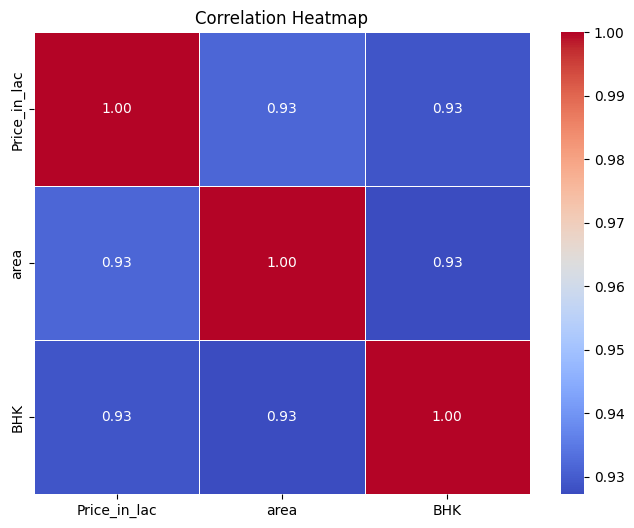

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = data[['Price_in_lac', 'area', 'BHK']]

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

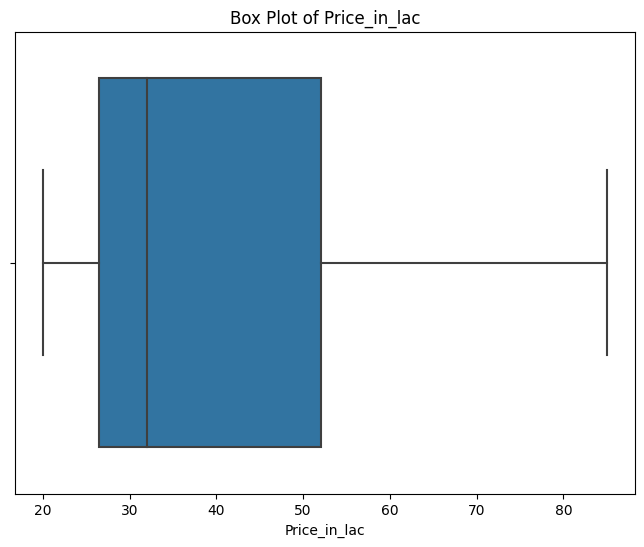

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Price_in_lac'])
plt.title('Box Plot of Price_in_lac')
plt.xlabel('Price_in_lac')
plt.show()

In [ ]:
#getting outliers
Q1 = data['Price_in_lac'].quantile(0.25)
Q3 = data['Price_in_lac'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Price_in_lac'] < lower_bound) | (data['Price_in_lac'] > upper_bound)]

# Print the outliers
print(outliers)

Empty DataFrame
Columns: [Location, Price_in_lac, area, BHK, Price_per_sqft]
Index: []


In [ ]:
#ans is empty due to less data

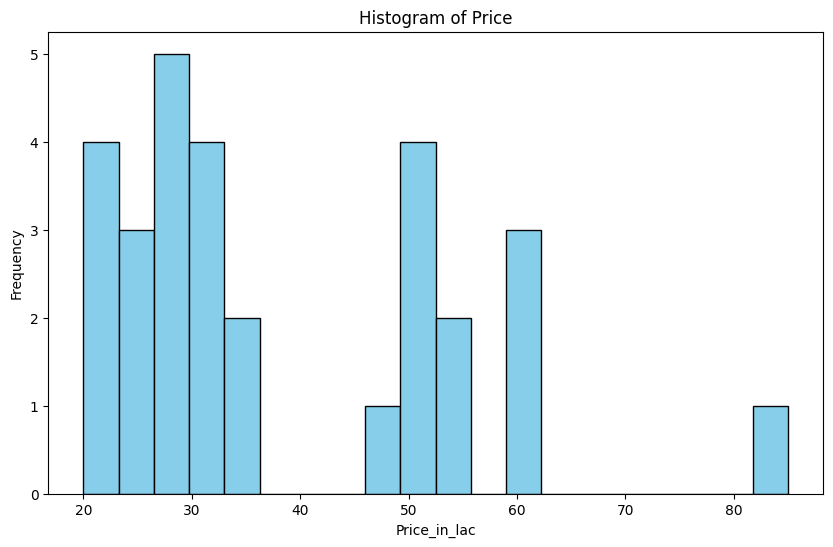

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Price_in_lac'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price_in_lac')
plt.ylabel('Frequency')
plt.show()

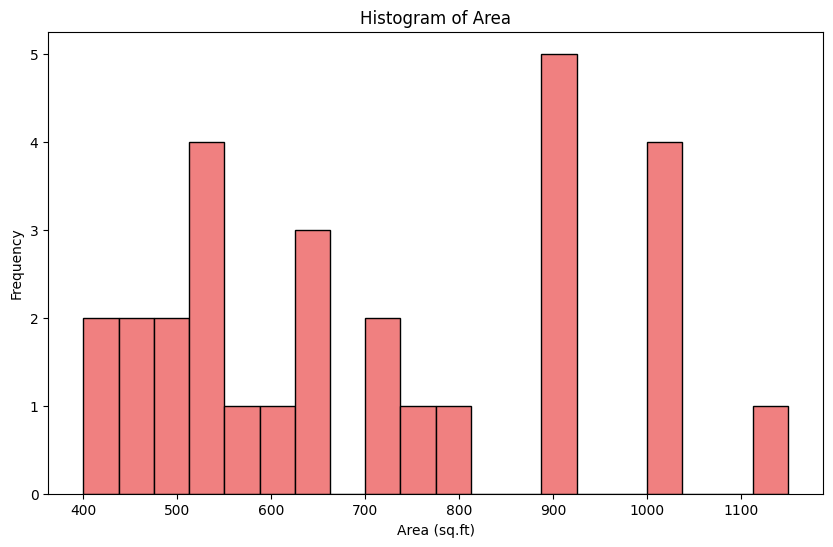

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['area'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Area')
plt.xlabel('Area (sq.ft)')
plt.ylabel('Frequency')
plt.show()

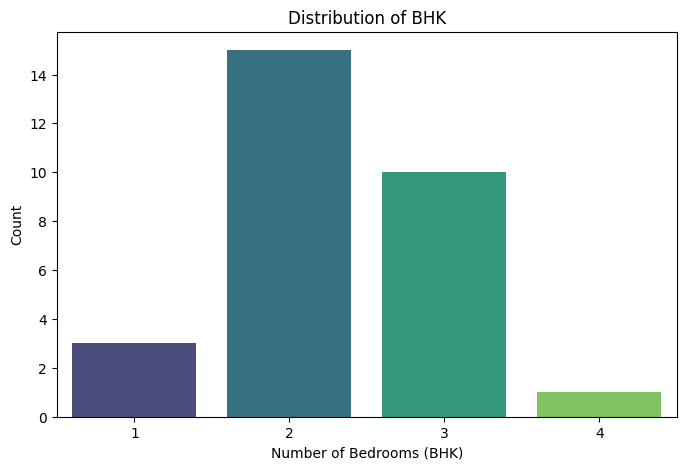

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='BHK', palette='viridis')
plt.title('Distribution of BHK')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Count')
plt.show()

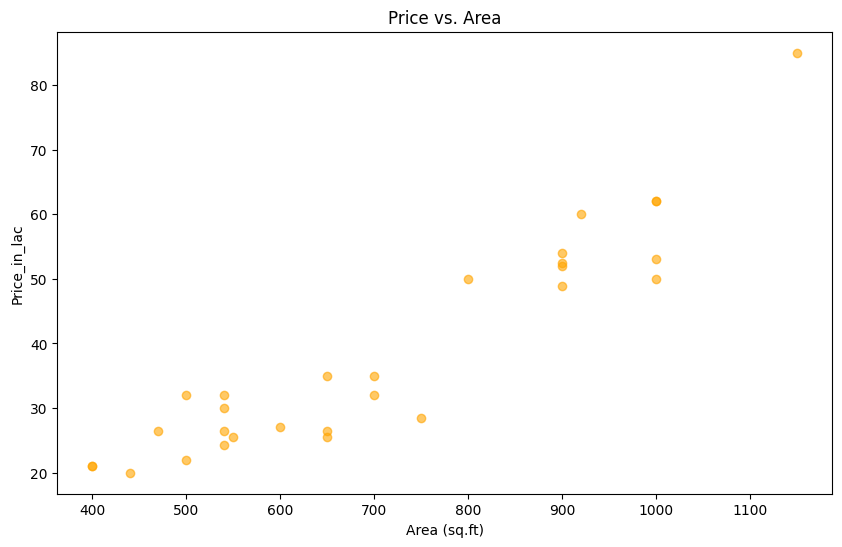

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['area'], data['Price_in_lac'], alpha=0.6, color='orange')
plt.title('Price vs. Area')
plt.xlabel('Area (sq.ft)')
plt.ylabel('Price_in_lac')
plt.show()

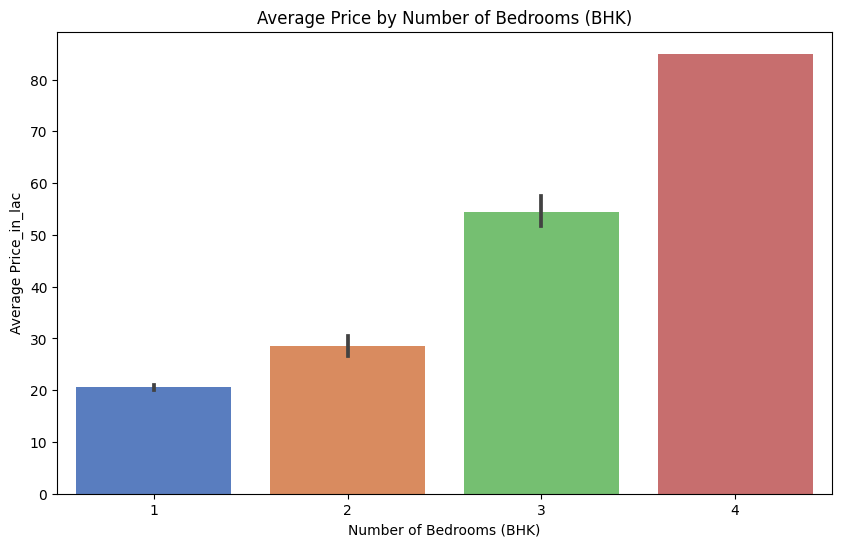

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='BHK', y='Price_in_lac', estimator=lambda x: sum(x) / len(x), palette='muted')
plt.title('Average Price by Number of Bedrooms (BHK)')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Average Price_in_lac')
plt.show()

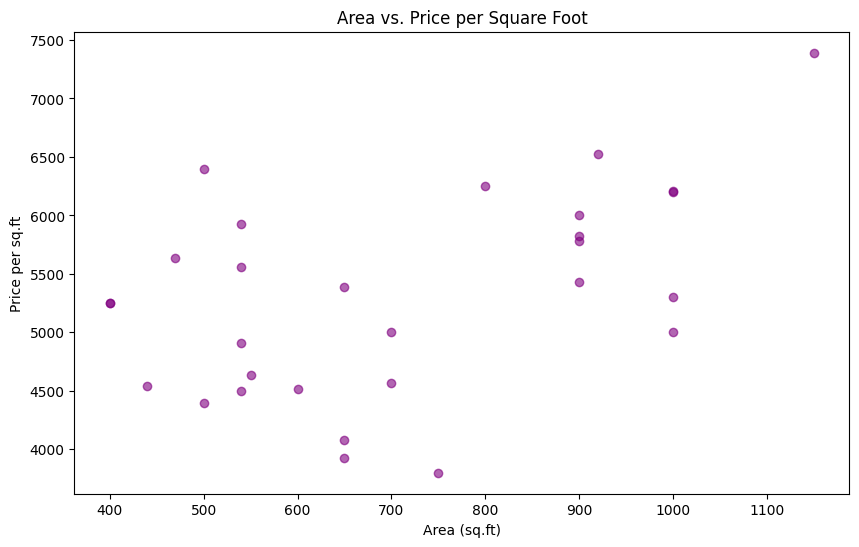

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['area'], data['Price_per_sqft'], alpha=0.6, color='purple')
plt.title('Area vs. Price per Square Foot')
plt.xlabel('Area (sq.ft)')
plt.ylabel('Price per sq.ft')
plt.show()


In [ ]:
import scipy.stats as stats

# Calculate the Pearson correlation coefficient and p-value
pearson_corr, pearson_p_value = stats.pearsonr(data['area'], data['Price_in_lac'])

# Print the results
print("Pearson Correlation Coefficient:", pearson_corr)
print("P-value:", pearson_p_value)

# Interpret the results based on the p-value and coefficient value
if pearson_p_value < 0.05:
    print("There is a statistically significant linear relationship.")
else:
    print("There is no statistically significant linear relationship.")


Pearson Correlation Coefficient: 0.931760462259588
P-value: 2.1406357522775471e-13
There is a statistically significant linear relationship.


In [ ]:
data

,Location,Price_in_lac,area,BHK,Price_per_sqft
0,Flat for sale in Dwarka Mor,60.0,920.0,3,6521.739130
1,Independent Builder Floor for sale in Dwarka Mor,35.0,650.0,2,5384.615385
2,Independent Builder Floor for sale in Dwarka Mor,32.0,700.0,2,4571.428571
3,Flat for sale in Dwarka Mor,25.5,550.0,2,4636.363636
4,Flat for sale in Dwarka Mor,50.0,800.0,3,6250.000000
5,Flat for sale in Dwarka Mor,54.0,900.0,3,6000.000000
6,Independent Builder Floor for sale in Dwarka Mor,52.0,900.0,3,5777.777778
7,Independent Builder Floor for sale in Dwarka Mor,24.3,540.0,2,4500.000000
8,Flat for sale in Dwarka Mor,27.1,600.0,2,4516.666667
9,Independent Builder Floor for sale in Dwarka Mor,30.0,540.0,2,5555.555556
